Part 1: Ultimate Challenge

In [965]:
#Import Pandas
import pandas as pd
#import numpy 
import numpy as np 
#import json
import json

In [966]:
#making sure all lines are of json format and then loading the file
file= open('logins.json','r')
file_content = file.read()
file.close()
data= json.loads(file_content)
df= pd.DataFrame(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [967]:
#changing login_time to Date and creating a new count column 
df.columns=['Date']
df['count']= 1
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,count
Date,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [968]:
# Resampling the data frame every 15 min
df_logins= df.resample('15Min').sum()
df_logins.head()

,count
Date,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [969]:
import matplotlib.pyplot as plt
import seaborn as sns

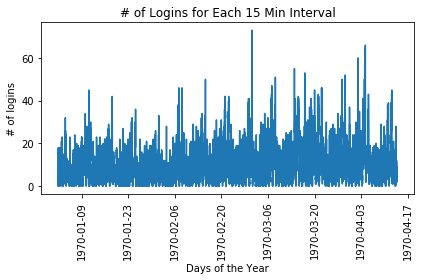

In [970]:
#Graphing the 15 min time interval vs Date 
plt.plot(df_logins['count'])
plt.xticks(rotation='vertical')
plt.xlabel('Days of the Year')
plt.ylabel('# of logins')
plt.title('# of Logins for Each 15 Min Interval')
plt.tight_layout()
plt.show()

There is an increasing trend from January to April and most of the logins are taking place at night.

Ultimate Part 2:Gotham and Metropolis

According to the summary of activity it could be that all night workers would live in Gotham. They would then not have to cross the toll bridge to go to work. Metropolis residence could be the opposite and only work during the day. There could be an issue of cost in each city that would make one city more or less expensive to live in.  The variable that would useful to measure would by why are people using the bridge. We could think of this as activity.

Collecting data on why people are crossing along with a z-test should help us determine if refunding tolls would be benificial. We could in fact use a null hypothsis of There is a significant difference in driver activity by refunding tolls. Using a z-test could give us a predetermined confidence interval related to activity and either reject or support our Null Hypothesis.

Part 3: Ultimate Challenge

In [971]:
file=open('ultimate.json','r')
file_c= file.read()
file.close()
data2=json.loads(file_c)
rider=pd.DataFrame(data2)
rider.head(6)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0


In [972]:
rider['avg_rating_by_driver'].fillna(rider['avg_rating_by_driver'].mean(), inplace=True)
rider['avg_rating_of_driver'].fillna(rider['avg_rating_of_driver'].mean(), inplace=True)
rider['phone'].fillna('Android', inplace=True)
rider.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [973]:
# Create all boolan and objects int
cities= {"King's Landing":1, 'Winterfell':2, 'Astapor':3}
rider['city']= rider['city'].map(lambda x: cities[x])
phone= {'Android':1, 'iPhone':2}
rider['phone']=rider['phone'].map(lambda i: phone[i])
rider['last_trip_date']=pd.to_datetime(rider['last_trip_date'])
rider['signup_date']=pd.to_datetime(rider['signup_date'])
rider['Active Status']= ((rider['last_trip_date']- rider['signup_date']) / np.timedelta64(1, 'M')).\
    map(lambda x:1 if x >5 else 0)

rider['ultimate_black_user']=rider['ultimate_black_user'].astype(int)

In [974]:
rider.drop(['surge_pct','last_trip_date','signup_date'], axis=1, inplace=True)
rider.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,trips_in_first_30_days,ultimate_black_user,weekday_pct,Active Status
0,3.67,5.0,4.7,1.10,1,2,4,1,46.2,0
1,8.26,5.0,5.0,1.00,3,1,0,0,50.0,0
2,0.77,5.0,4.3,1.00,3,2,3,0,100.0,0
3,2.36,4.9,4.6,1.14,1,2,9,1,80.0,1
4,3.13,4.9,4.4,1.19,2,1,14,0,82.4,0


In [975]:
print(rider['Active Status'].value_counts())

0    38806
1    11194
Name: Active Status, dtype: int64


There are 38806 drivers with at least 6 month retention.

In [976]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

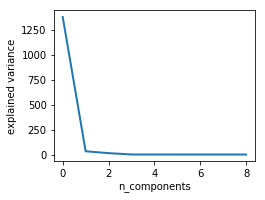

In [977]:
#setup a logistic regresssion using a pipeline with multiple param grid values and GridsearchCV

logistic= LogisticRegression()
pca=PCA()
pipe= Pipeline(steps=[('scaler', StandardScaler),('pca',pca),('logistic',logistic)])
                 
X=rider.drop(['Active Status'], axis=1)
y=rider['Active Status']
                 
pca.fit(X)

plt.figure(1, figsize=(4,3))
plt.clf()
plt.axes([.2,.2,.7,.7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()

In [978]:
#Using decomposition to get the top 4
pca=PCA(n_components=4, svd_solver='full')
pca.fit(rider.drop(['Active Status'], axis=1))

X=pca.transform(rider.drop(['Active Status'], axis=1))
y=rider['Active Status']

scaler=StandardScaler()
scaler.fit(X)
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=42)

logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_tree_pred=tree.predict(X_test)
print('Decision Tree Scores')
print('{:20}{:3f}'.format('f1_score', f1_score(y_test, y_tree_pred)))
print('{:20}{:3f}'.format('test_accuracy', accuracy_score(y_test, y_tree_pred)))
print('Confusion Matrix:',confusion_matrix(y_test, y_tree_pred))
print(tree.feature_importances_)
print('Logistic Regression Scores')
print('{:20}{:3f}'.format('f1 score', f1_score(y_test, y_pred)))
print('{:20}{:3f}'.format('test_accuracy', accuracy_score(y_test, y_pred)))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

C:\Users\Kevin Bryson\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Decision Tree Scores
f1_score            0.377543
test_accuracy       0.719343
Confusion Matrix: [[22198  4932]
 [ 4891  2979]]
[0.33224573 0.19326406 0.21244165 0.26204856]
Logistic Regression Scores
f1 score            0.145579
test_accuracy       0.779657
Confusion Matrix: [[26631   499]
 [ 7213   657]]


I chose to run a logistic regression and a decision tree to see if one was better than the other. I more comprehensive strategy would have been to run each through a GridSearchCV using a Pipeline. 

If the decision tree and the logistic regression where given an unknown data set, it seems that logistic regression would have a higher accuracy rate. The feature that was the most important for us were the ones that had to do with surveys and ratings of drives.
    - To increase retention, drivers could be exposed to a class on customer service to increase ratings. This class could be completed as an online class at the drivers own pace.
    